<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Capstone Part 4:** Finding Duplicates


#### Student Author: Abigail Hedden

## Objectives


* Identify duplicate rows in the dataset, and analyze their characteristics
* Visualize the distribution of duplicates based on key attributes
* Remove duplicate values based on specific criteria
* Outline the process of verifying and documenting duplicate removal

## Set-up


In [31]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [7]:
# load in the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Identify and Analyze Duplicates


#### Identify Duplicate Rows

In [13]:
# count the number of duplicate rows 
count_duplicates = df.duplicated().sum()
print('Number of duplicates:', count_duplicates)

print('')

# display first few duplicate rows
duplicates = df[df.duplicated()]
print(duplicates.head())

Number of duplicates: 20

       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   


### Analyze Characteristics of Duplicates

#### Identify duplicate rows based on selected columns such as `MainBranch`, `Employment`, and `RemoteWork`. Then, analyze which columns frequently contain identical values **within** these duplicate rows.

Goal: Analyze which other columns frequently contain identical values across duplicate rows.
1. Identify duplicates using a subset of columns
2. Extract all rows belonging to duplicate groups
3. Group those duplicates
4. Check how much other columns vary inside those groups
5. Print the average “number of unique values” per column across all duplicate groups
<br>

In [30]:
### create a df to display all rows that are duplicates of a previous row in terms of 'MainBranch', 'Employment', and 'RemoteWork'
# in other words, rows that have the same of those 3 columns as a previous row

# create a boolean mask for duplicates to just look at duplicate values in specific columns
mask = df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep='first')

# extract duplicate rows only
duplicates_sel = df[mask]

### analyze which columns frequently contain identical values within the duplicate rows
# find all rows that share the exact same values in the specified three columns
mask_all = df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)
duplicates_all = df[mask_all]

# group the duplicated rows by the subset
grouped_dup = duplicates_all.groupby(['MainBranch', 'Employment', 'RemoteWork'])

# for each duplicate group, check how much other columns vary
# if the unique count displayed = 1, it means that the column was identical for all rows in the duplicate group
columns_to_check = [col for col in df.columns if col not in ['MainBranch', 'Employment', 'RemoteWork']]
unique_counts = grouped_dup[columns_to_check].nunique()

# average these unique counts over all groups for each column
# this gives an idea of how much the columns tend to vary across duplicate groups to signal columns that may be helpful to remove
# if the average unique count is close to 1, it means that column is usually identical within duplicate groups
# if the average is larger than 1, that column tends to vary within groups
mean_unique_counts = unique_counts.mean().sort_values()
print(mean_unique_counts)

print('')
# look specifically at columns where mean unique count is exactly 1
# columns with mean unique count = 1: columns that do not vary at all inside duplicate groups
cols_with_identical_values = mean_unique_counts[mean_unique_counts == 1].index.tolist()
print('fully identical:', cols_with_identical_values)
# 'Check' is the only column that does not vary at all within duplicates

# look specifically at columns where mean unique count is less than 1.3 (vary, but only slightly)
cols_with_little_var = mean_unique_counts[mean_unique_counts <= 1.3].index.tolist()
print('little variability:', cols_with_little_var)
# ICorPM', 'Check', 'TBranch', and 'ProfessionalCloud' have very little variability within duplicates

ICorPM                       0.924765
Check                        1.000000
TBranch                      1.115987
ProfessionalCloud            1.275862
BuildvsBuy                   1.332288
                              ...    
LearnCodeOnline             74.451411
ToolsTechHaveWorkedWith     86.169279
LanguageWantToWorkWith      90.467085
LanguageHaveWorkedWith      95.592476
ResponseId                 171.398119
Length: 111, dtype: float64

fully identical: ['Check']
little variability: ['ICorPM', 'Check', 'TBranch', 'ProfessionalCloud']


### Visualize duplicates distribution
1. Create visualizations to show the distribution of duplicates across different categories
2. Use bar charts or pie charts to represent the distribution of duplicates by `Country` and `Employment`


<ipython-input-48-9aaaf1e9b89f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates_all['Country'] = duplicates_all['Country'].replace({


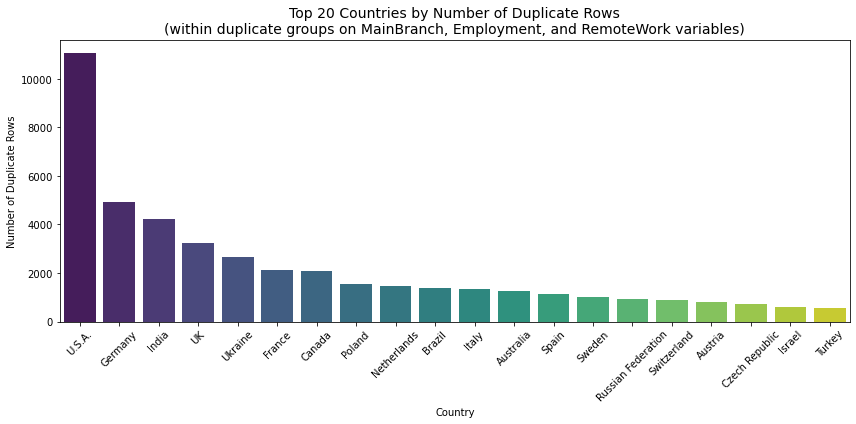

In [48]:
# shorten UK and USA names for better visuals
duplicates_all['Country'] = duplicates_all['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'U.S.A.'
})

# count duplicates by `Country` within duplicate groups
country_counts = duplicates_all['Country'].value_counts()

# only show top 20 countries with most duplicates for better visualization
top_countries = country_counts.head(20)

# bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 20 Countries by Number of Duplicate Rows\n'
    '(within duplicate groups on MainBranch, Employment, and RemoteWork variables)',
    fontsize=14
)
plt.xlabel('Country')
plt.ylabel('Number of Duplicate Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
